Task: Use any unsupervised technique to extract patterns or segregate data into groups.
    
User Story: User should be able to provide a data point (a row) and program should be able to identify
to which group given data point belongs to and why?

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.isnull().any(axis=0)

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [5]:
df.isnull().any(axis=1).sum()  # number of rows with missing values

135080

In [6]:
df.isnull().any(axis=0).sum() # 2 columns viz., Description and CustomerID having missing values

2

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df2 = df[['Quantity', 'UnitPrice', 'Country']]

In [9]:
df2 = df2[df2['Country'] == 'Germany']     

In [11]:
df2.head()      # dataframe with 3 columns 'Quantity', 'UnitPrice', 'Country' and filter the data for 'Germany'

,Quantity,UnitPrice,Country
1109,6,2.95,Germany
1110,6,2.55,Germany
1111,12,0.85,Germany
1112,12,1.65,Germany
1113,12,1.95,Germany


In [12]:
# Selecting Numeric features for clustering
select_features = df2[['Quantity', 'UnitPrice']]

In [13]:
# standardize select_features data means it will have mean = 0 and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(select_features)

In [14]:
scaled_data

array([[-0.35653719, -0.06145277],
       [-0.35653719, -0.08562465],
       [-0.02068078, -0.18835514],
       ...,
       [-0.02068078, -0.18835514],
       [-0.02068078, -0.11402661],
       [-0.13263292, -0.14001138]])

In [15]:
# determining optimal number of clusters (k) using Elbow method

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[18989.999999999996,
 11016.583492569785,
 6505.680321133764,
 4543.583727020377,
 3395.983389758388,
 2695.280386328506,
 2122.604732060759,
 1631.3057725504568,
 1367.4338769805559,
 1123.2034921660388]

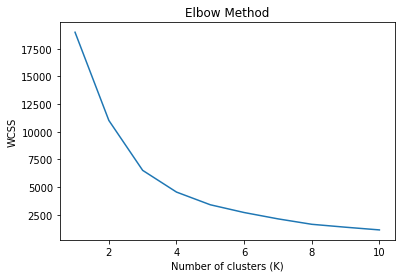

In [17]:
# Plot the Elbow Method graph to determine K

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

On the basis of above plot I select k = 3 because from that point rate of decrease in wcss starts to slow down.

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Applying K-Means clustering with the selected K

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df2['cluster'] = kmeans.fit_predict(scaled_data)

In [24]:
df2.head()

,Quantity,UnitPrice,Country,cluster
1109,6,2.95,Germany,0
1110,6,2.55,Germany,0
1111,12,0.85,Germany,0
1112,12,1.65,Germany,0
1113,12,1.95,Germany,0


In [25]:
df2['cluster'].unique()

array([0, 1, 2])

In [26]:
# Performing dimensionality reduction for visualization (PCA)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [27]:
reduced_data

array([[ 0.20865619, -0.29556354],
       [ 0.19156409, -0.31265564],
       [-0.11856368, -0.14781072],
       ...,
       [-0.11856368, -0.14781072],
       [-0.06600547, -0.09525251],
       [-0.00521736, -0.19278864]])

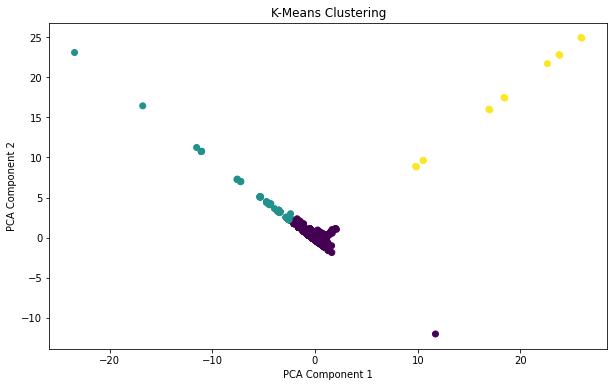

In [29]:
# Visualize the clusters (for demonstration purposes)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df2['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [30]:
# Now, given a data point (a row), we can assign it to a cluster
# For example, let's assume you have a new_data_point as a Pandas Series
# where the columns match the features used for clustering

new_data_point = pd.Series({'Quantity': 10, 'UnitPrice': 2.5})

In [31]:
new_data_point

Quantity     10.0
UnitPrice     2.5
dtype: float64

In [32]:
# Standardize the new data point using the same scaler

scaled_new_data_point = scaler.transform(new_data_point.values.reshape(1, -1))

In [33]:
scaled_new_data_point

array([[-0.13263292, -0.08864614]])

In [34]:
# Predict the cluster for the new data point

new_data_point_cluster = kmeans.predict(scaled_new_data_point)

In [35]:
new_data_point_cluster

array([0])

In [36]:
print(f'The new data point belongs to Cluster {new_data_point_cluster[0]}')

The new data point belongs to Cluster 0


In [37]:
new_data_point_2 = pd.Series({'Quantity': 8, 'UnitPrice': 1.55})

In [38]:
scaled_new_data_point_2 = scaler.transform(new_data_point_2.values.reshape(1,-1))

In [39]:
# Predict cluster 

new_data_point_2_cluster = kmeans.predict(scaled_new_data_point_2)

In [40]:
new_data_point_2_cluster

array([0])

In [41]:
print(f'The new data point belongs to Cluster {new_data_point_2_cluster[0]}')

The new data point belongs to Cluster 0
